# Classify based on the parameters of the data, that whether the user will go for purchase or not

## Step 1 : Import the necessary libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

## Step 2: Loading the dataset

In [31]:
data= pd.read_csv('Health_Insurance.csv')
data.head()

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0


In [3]:
data.shape

(400, 3)

## Step 4: Check for the Linearly seperable target

<AxesSubplot:xlabel='EstimatedSalary', ylabel='Purchased'>

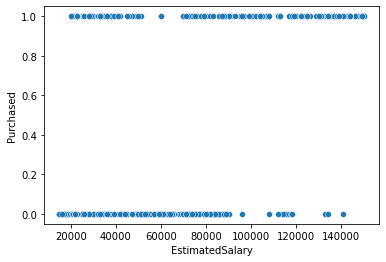

In [6]:
sns.scatterplot(x = 'EstimatedSalary', y = 'Purchased', data = data)

## Step 7: Create independent and target varialbes

In [18]:
X = data[['Age']]
y = data[['Purchased']]

## Step 8 : Seperate the data into train test split

In [19]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

X_train.shape, X_test.shape

((300, 1), (100, 1))

## Step 9: Feature Scaling

In [ ]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
ss.fit_transform(X_train[['Age', 'EstimatedSalary']])
ss.fit_transform(X_test[['Age', 'EstimatedSalary']])

## Step 10 : Apply Logistic Regression on X_train and y_train

In [20]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr. fit(X_train, y_train)

LogisticRegression()

## Step 11: Do the predictions on the y_train data and store it in y_pred

In [21]:
y_pred = lr.predict(X_test)
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0], dtype=int64)

In [22]:
lr.predict_proba(X_test)[:, -1]

array([0.09422938, 0.30406863, 0.20324359, 0.09422938, 0.20324359,
       0.05725935, 0.11069398, 0.2338386 , 0.01194249, 0.68706661,
       0.09422938, 0.06774737, 0.26749297, 0.34330159, 0.01700871,
       0.12962371, 0.26749297, 0.01425547, 0.90216343, 0.20324359,
       0.20324359, 0.68706661, 0.42804024, 0.68706661, 0.02878402,
       0.758634  , 0.06774737, 0.07999345, 0.26749297, 0.12962371,
       0.02028276, 0.26749297, 0.92958038, 0.26749297, 0.03424577,
       0.01194249, 0.02417155, 0.17573342, 0.11069398, 0.758634  ,
       0.05725935, 0.42804024, 0.05725935, 0.20324359, 0.51722135,
       0.05725935, 0.26749297, 0.84334777, 0.04831085, 0.758634  ,
       0.92958038, 0.17573342, 0.20324359, 0.17573342, 0.94974223,
       0.60531877, 0.07999345, 0.04831085, 0.758634  , 0.02878402,
       0.12962371, 0.95764569, 0.01425547, 0.2338386 , 0.01425547,
       0.95764569, 0.03424577, 0.05725935, 0.38479768, 0.4724107 ,
       0.12962371, 0.20324359, 0.02417155, 0.60531877, 0.05725

In [24]:
X_test.tail(5)

,Age
146,27
135,23
390,48
264,48
364,42


## Step 13: Check the accuracy of y_test and y_pred

In [25]:
lr.score(y_test, y_pred)

0.74

In [28]:
from sklearn.metrics import confusion_matrix
cm= confusion_matrix(y_test, y_pred)
cm

array([[66,  2],
       [ 8, 24]], dtype=int64)

In [30]:
from sklearn.metrics import classification_report
clf = classification_report(y_test,y_pred)
print(clf)

              precision    recall  f1-score   support

           0       0.89      0.97      0.93        68
           1       0.92      0.75      0.83        32

    accuracy                           0.90       100
   macro avg       0.91      0.86      0.88       100
weighted avg       0.90      0.90      0.90       100

